### Importing Libraries 

In [62]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns 
import matplotlib.pyplot as plt

In [63]:
df=pd.read_csv('data\housing.csv')

In [64]:
df.head()
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Data Exploration

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [66]:
df.dropna(inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [68]:
X=df.drop(['median_house_value'],axis=1)
Y=df['median_house_value']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [69]:
train_data=X_train.join(Y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
489,-122.25,37.86,48.0,2153.0,517.0,1656.0,459.0,3.0417,NEAR BAY,489600.0
2117,-119.73,36.76,30.0,1548.0,282.0,886.0,311.0,3.1000,INLAND,71300.0
18861,-122.19,38.13,5.0,7854.0,1446.0,4361.0,1395.0,4.9504,NEAR BAY,214800.0
6855,-118.15,34.06,28.0,3855.0,922.0,2517.0,874.0,3.5050,<1H OCEAN,204300.0
5321,-118.43,34.05,52.0,1693.0,290.0,727.0,305.0,6.7115,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
11065,-117.88,33.79,32.0,1484.0,295.0,928.0,295.0,5.1418,<1H OCEAN,190300.0
17455,-120.43,34.70,26.0,2353.0,389.0,1420.0,389.0,3.8700,NEAR OCEAN,125800.0
5249,-118.45,34.08,52.0,1500.0,176.0,384.0,145.0,7.1576,<1H OCEAN,500001.0
12290,-116.97,33.94,29.0,3197.0,632.0,1722.0,603.0,3.0432,INLAND,91200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

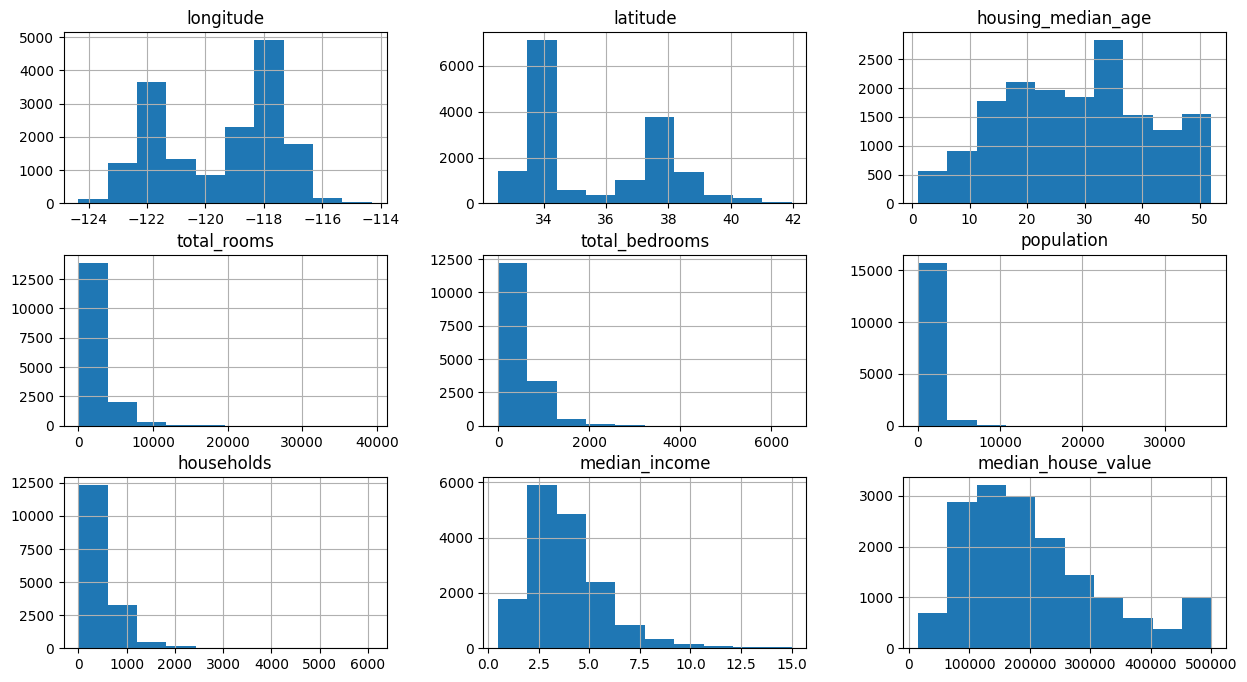

In [70]:
train_data.hist(figsize=(15,8))

### To remove the skewness we apply log conversion to change the value 

In [71]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

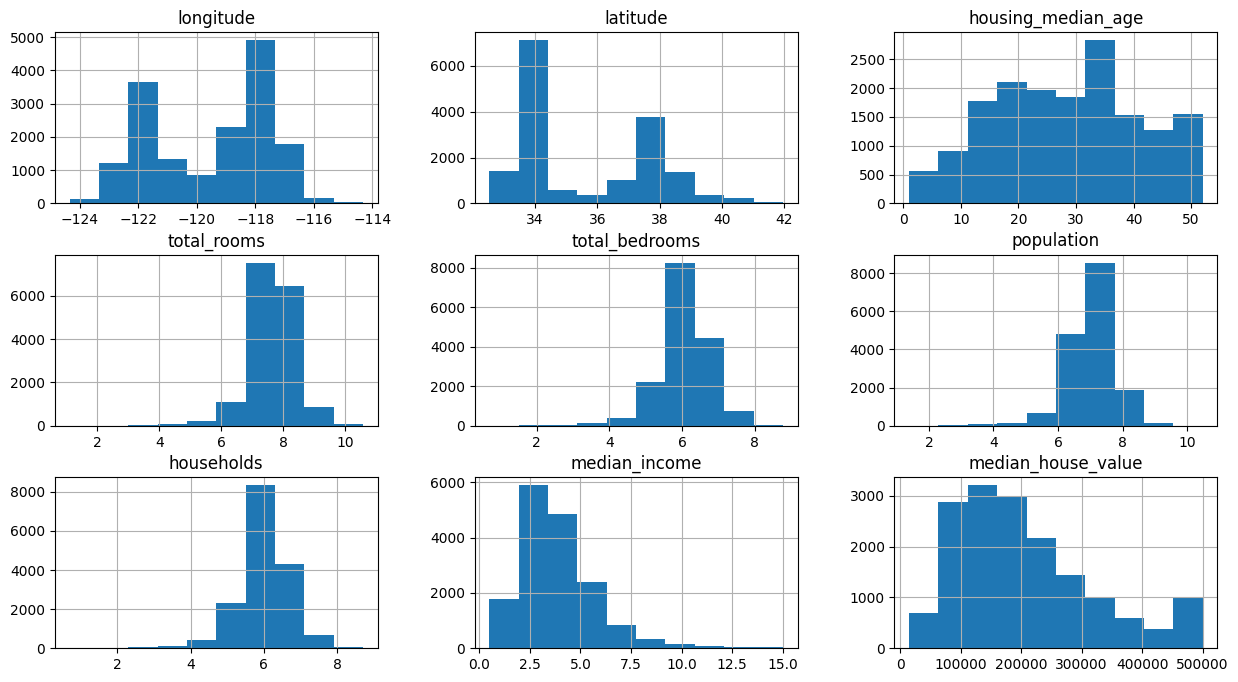

In [72]:
train_data.hist(figsize=(15,8))

In [73]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7232
INLAND        5188
NEAR OCEAN    2093
NEAR BAY      1830
ISLAND           3
Name: count, dtype: int64

### Instead of Ordinal Encoding We are going to one hot encoding

In [74]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity))

In [75]:
train_data=train_data.drop('ocean_proximity',axis=1)


In [76]:
train_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

### FEATURE ENGINEERING

In [77]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

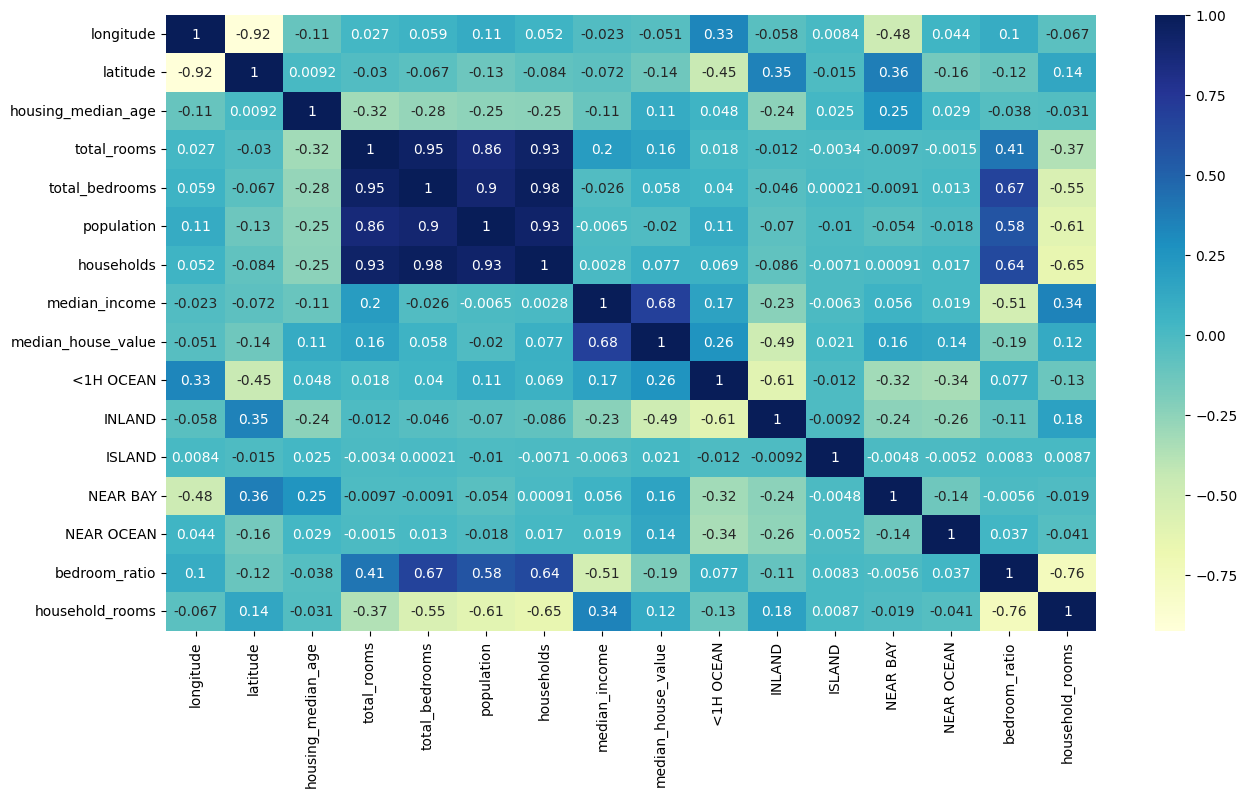

In [78]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [79]:
regressor=LinearRegression()

x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

In [80]:
regressor.fit(x_train,y_train)

LinearRegression()

In [81]:
test_data=X_test.join(Y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity))

test_data=test_data.drop('ocean_proximity',axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']



In [82]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [83]:
regressor.score(x_test,y_test)

0.6794071835586117

In [86]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()
forest.fit(x_train,y_train)
forest.score(x_test,y_test)

0.8236321198104761

### Cross Validation for HyperParameter tuning 

In [90]:
from sklearn.model_selection import GridSearchCV

param_grid={
    "n_estimators":[100,300,400],
    "max_features":[20],
    "min_samples_split":[2,4,6,8],
    "max_depth":[None,4,8]
 
}

grid_search=GridSearchCV(forest,param_grid,scoring="neg_mean_squared_error",return_train_score=True)

grid_search.fit(x_train,y_train)

KeyboardInterrupt: 

In [89]:
best_forest=grid_search.best_estimator_
best_forest.score(x_test,y_test)

0.820389364977741